In [1]:
import pickle
import numpy as np
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
#from keras.utils.np_utils import to_categorical
import os

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import pickle
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import os

#loading from directory
label = os.listdir("dataset_image")
dataset=[]
for image_label in label:
    images = os.listdir("dataset_image/"+image_label)                 
    for image in images:
        img = cv2.imread("dataset_image/"+image_label+"/"+image)
        img = cv2.resize(img, (64, 64))
        dataset.append((img,image_label))

X=[]
Y=[]
#integer encode the labels
for  input_image,image_label in dataset:
    X.append(input_image)                          
    Y.append(label.index(image_label))
X=np.array(X)
Y=np.array(Y)

#data_set_train=(X_train,y_train)
#data_set_test=(X_test,y_test)


In [3]:
##split dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

y = 2


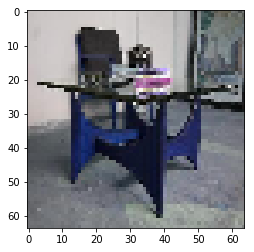

In [4]:
# Example of a picture
import matplotlib.pyplot as plt
%matplotlib inline
index = 2
plt.imshow(X_train[index])
print ("y = " + str((y_train[index])))

In [5]:
print(y_train)

[1 5 2 ... 0 1 3]


In [6]:
set(y_train)

{0, 1, 2, 3, 5}

In [7]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [8]:
# Flatten the training and test images
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.

# Convert training and test labels to one hot matrices
Y_train =convert_to_one_hot(y_train, 6)
Y_test = convert_to_one_hot(y_test, 6)

print("number of training examples = " + str(X_train.shape[1]))
print("number of test examples = " + str(X_test.shape[1]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

number of training examples = 5500
number of test examples = 1376
X_train shape: (12288, 5500)
Y_train shape: (6, 5500)
X_test shape: (12288, 1376)
Y_test shape: (6, 1376)


In [9]:
def create_placeholders(n_x, n_y):
   
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    keep_prob=tf.placeholder(tf.float32,name="Dropout")
    
    return X, Y , keep_prob

In [10]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. 
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3, W4, b4
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    
    W1 = tf.get_variable("W1", [400, 12288], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [400, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [6, 400], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [6, 1], initializer = tf.zeros_initializer())
    #W3 = tf.get_variable("W3", [6, 20], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    #b3 = tf.get_variable("b3", [6, 1], initializer = tf.zeros_initializer())
    #W4 = tf.get_variable("W4", [6, 10], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    #b4 = tf.get_variable("b4", [6, 1], initializer = tf.zeros_initializer())
    

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
                  #"W3": W3,
                  #"b3": b3}
                  #"W4": W4,
                  #"b4": b4}
    
    return parameters

In [11]:
def forward_propagation(X, parameters,keep_prob):
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    #W3 = parameters['W3']
    #b3 = parameters['b3']
    #W4 = parameters['W4']
    #b4 = parameters['b4']
    
                 # Numpy Equivalents:
    with tf.device("/gpu:0"):
        Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
        A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
        drop_out=tf.nn.dropout(A1,keep_prob)
        Z2 = tf.add(tf.matmul(W2,drop_out), b2)                     # Z2 = np.dot(W2, a1) + b2
        #A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
        #drop_out=tf.nn.dropout(A2,keep_prob)
        #Z3 = tf.add(tf.matmul(W3, drop_out), b3)                     # Z3 = np.dot(W3,Z2) + b3
        #A3 = tf.nn.relu(Z3)
        #drop_out=tf.nn.dropout(A3,keep_prob)
        #Z4 = tf.add(tf.matmul(W4,drop_out),b4)
    
    
    return Z2

In [12]:
def compute_cost(Z2, Y):
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z2)
    labels = tf.transpose(Y)
    
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    
    
    return cost

In [13]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.00001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
  
    
    #Returns:
    #parameters -- parameters learnt by the model. They can then be used to predict.
    
    
    #ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    
    X, Y, keep_prob = create_placeholders(n_x, n_y)
    

    # Initialize parameters
    
    parameters = initialize_parameters()
    
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    
    with tf.device("/gpu:0"):
        Z2 = forward_propagation(X, parameters,keep_prob)
    
    
    # Cost function: Add cost function to tensorflow graph
    
        cost = compute_cost(Z2, Y)

    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):
            epoch_cost = 0
            
            if epoch %100==0:
                print(epoch)
            
            # let's start training
            _, c = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train,keep_prob:0.2})
            
            if epoch %100==0:
                print('epoch:',epoch,'-','cost:',c)
            # Test model
        correct_prediction = tf.equal(tf.argmax(Z2), tf.argmax(Y))

        # Calculate accuracy for 3000 examples
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print("Test_Accuracy:", accuracy.eval({X: X_test, Y: Y_test,keep_prob:1.0}))
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train,keep_prob:1.0}))
        
        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print("Parameters have been trained!")
    
    
        return parameters

In [14]:
parameters = model(X_train, Y_train, X_test, Y_test)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

0
epoch: 0 - cost: 2.9398248
100
epoch: 100 - cost: 1.3003687
200
epoch: 200 - cost: 1.159558
300
epoch: 300 - cost: 1.0712638
400
epoch: 400 - cost: 1.0019842
500
epoch: 500 - cost: 0.95297337
600
epoch: 600 - cost: 0.919193
700
epoch: 700 - cost: 0.8698956
800
epoch: 800 - cost: 0.84207547
900
epoch: 900 - cost: 0.81111735
1000
epoch: 1000 - cost: 0.79343927
1100
epoch: 1100 - cost: 0.7598449
1200
epoch: 1200 - cost: 0.7453084
1300
epoch: 1300 - cost: 0.70756596
1400
epoch: 1400 - cost: 0.7042816
Test_Accuracy: 0.72020346
Train Accuracy: 0.85636365
Parameters have been trained!


In [ ]:
import scipy
from PIL import Image
from scipy import ndimage

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "thumbs_up.jpg"
## END CODE HERE ##

# We preprocess your image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64, 64)).reshape((1, 64 * 64 * 3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))